In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('data.csv')

In [17]:
df.shape

(8518, 8)

In [18]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [19]:
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [21]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [22]:
df['Reviewer Name']=df['Reviewer Name'].fillna("Unknown")

In [23]:
df['Review Title']=df['Review Title'].fillna("No Title")

In [24]:
df['Place of Review']=df['Place of Review'].fillna("Unknown")

In [25]:
df['Up Votes']=df['Up Votes'].fillna(0)

In [26]:
df['Down Votes']=df['Down Votes'].fillna(0)

In [27]:
df['Month']=df['Month'].fillna("Unknown")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8518 non-null   object 
 1   Review Title     8518 non-null   object 
 2   Place of Review  8518 non-null   object 
 3   Up Votes         8518 non-null   float64
 4   Down Votes       8518 non-null   float64
 5   Month            8518 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [29]:
df = df.dropna(subset=['Review text'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8510 entries, 0 to 8509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8510 non-null   object 
 1   Review Title     8510 non-null   object 
 2   Place of Review  8510 non-null   object 
 3   Up Votes         8510 non-null   float64
 4   Down Votes       8510 non-null   float64
 5   Month            8510 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8510 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.4+ KB


In [31]:
df.shape

(8510, 8)

In [32]:
df['Review text'].isnull().sum()

0

In [34]:
#Sentiment Label Creation 
df['Sentiment'] = df['Ratings'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

In [35]:
df['Sentiment'].value_counts()

Sentiment
Positive    7438
Negative    1072
Name: count, dtype: int64

In [36]:
#Review Lengths
df['Review_Length'] = df['Review text'].apply(lambda x: len(str(x).split()))

In [37]:
df['Review_Length'].describe()

count    8510.000000
mean        6.306698
std         7.726199
min         2.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        96.000000
Name: Review_Length, dtype: float64

In [38]:
#Ratings Distribution
import matplotlib.pyplot as plt

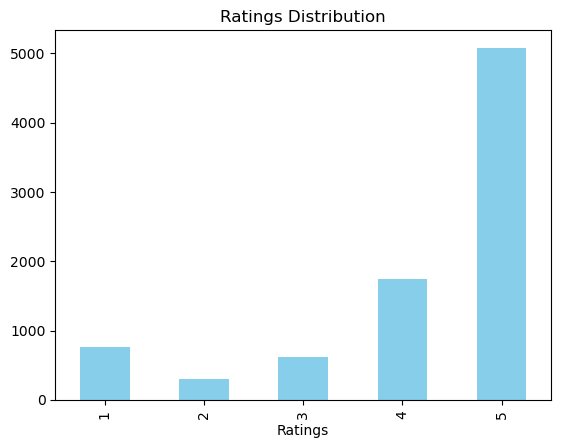

In [39]:
df['Ratings'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Ratings Distribution")
plt.show()

In [ ]:
#Top Words in Positive vs Negative Reviews

In [44]:
from collections import Counter

positive_words = ' '.join(df[df['Sentiment']=='Positive']['Review text']).split()
negative_words = ' '.join(df[df['Sentiment']=='Negative']['Review text']).split()

print("Top Positive Words:", Counter(positive_words).most_common(10))
print("Top Negative Words:", Counter(negative_words).most_common(10))

Top Positive Words: [('MORE', 7438), ('Good', 930), ('good', 906), ('productREAD', 802), ('is', 796), ('for', 749), ('GoodREAD', 698), ('and', 693), ('the', 617), ('product', 562)]
Top Negative Words: [('MORE', 1072), ('not', 277), ('the', 263), ('is', 255), ('of', 182), ('very', 158), ('quality', 145), ('shuttle', 143), ('product', 135), ('and', 123)]


In [45]:
#Text Cleaning 

In [46]:
#1. Lowercasing 
df['lowercase'] = df['Review text'].str.lower()

In [47]:
#2. Remove Flipkart Artifacts 
df['no_artifacts'] = df['lowercase'].str.replace(r'\b(more|read|productread)\b', '', regex=True)

In [48]:
#3. Remove Punctuation, Numbers, Special Characters 
df['no_punct'] = df['no_artifacts'].str.replace(r'[^a-z\s]', '', regex=True)

In [49]:
#4. Tokenization
df['tokens'] = df['no_punct'].apply(lambda x: x.split())

In [51]:
#5. Remove Stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [52]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [53]:
df['no_stopwords'] = df['tokens'].apply(lambda words: [w for w in words if w not in stop_words])

In [54]:
#6. Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sharw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
lemmatizer = WordNetLemmatizer()


In [56]:
df['lemmatized'] = df['no_stopwords'].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])

In [57]:
#7. Join Back into Cleaned Text
df['Cleaned_Review'] = df['lemmatized'].apply(lambda words: ' '.join(words))

In [70]:
# Step 3: Feature Extraction (Text Embeddings)

In [71]:
X = df['Cleaned_Review']  
y = df['Sentiment']        

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [73]:
#TF‑IDF Vectorization (Baseline Embedding) 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [74]:
#Bag of Words (Optional Baseline) 
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=5000)
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)

In [75]:
#Word2Vec (Semantic Embeddings) 
from gensim.models import Word2Vec

tokens = [review.split() for review in df['Cleaned_Review']]
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=2, workers=4)

In [82]:
#Step 4: Model Training & Evaluation 

In [83]:
#Baseline Model (TF‑IDF + Logistic Regression) 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.84      0.43      0.57       214
    Positive       0.92      0.99      0.95      1488

    accuracy                           0.92      1702
   macro avg       0.88      0.71      0.76      1702
weighted avg       0.91      0.92      0.91      1702

[[  91  123]
 [  17 1471]]


In [84]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
print("Naive Bayes:", nb.score(X_test_tfidf, y_test))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
print("Random Forest:", rf.score(X_test_tfidf, y_test))

# SVM
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)
print("SVM:", svm.score(X_test_tfidf, y_test))

Naive Bayes: 0.9042303172737955
Random Forest: 0.918331374853114
SVM: 0.9142185663924794


In [85]:
#Step 5: Insights Extraction

In [86]:
#Identify Themes in Negative Reviews 
from collections import Counter

negative_words = ' '.join(df[df['Sentiment']=='Negative']['Cleaned_Review']).split()
print(Counter(negative_words).most_common(20))

[('shuttle', 310), ('quality', 282), ('product', 233), ('bad', 186), ('good', 128), ('worst', 105), ('poor', 94), ('qualityread', 94), ('goodread', 77), ('one', 76), ('dont', 71), ('buy', 66), ('day', 66), ('box', 57), ('cork', 53), ('mavis', 52), ('time', 50), ('flipkart', 46), ('got', 46), ('game', 44)]


In [87]:
#Identify Themes in Positive Reviews 
positive_words = ' '.join(df[df['Sentiment']=='Positive']['Cleaned_Review']).split()
print(Counter(positive_words).most_common(20))

[('good', 2000), ('goodread', 1231), ('product', 983), ('nice', 772), ('shuttle', 669), ('quality', 533), ('niceread', 464), ('best', 409), ('qualityread', 354), ('original', 282), ('one', 264), ('delivery', 255), ('price', 234), ('superread', 199), ('genuine', 164), ('time', 149), ('excellent', 147), ('flipkart', 142), ('super', 139), ('great', 125)]


In [89]:
import joblib

# Save trained model
joblib.dump(model, "sentiment_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']